# gather data

In [31]:
import pandas as pd
import glob

# find the *_deployments.csv files in ../DATA/deployments
deployments_csvs = glob.glob('../DATA/deployments/*_deployments.csv')
deployments_csvs

['../DATA/deployments/realms_deployments.csv',
 '../DATA/deployments/tally_deployments.csv',
 '../DATA/deployments/daostack_deployments.csv',
 '../DATA/deployments/daohaus_deployments.csv',
 '../DATA/deployments/snapshot_deployments.csv',
 '../DATA/deployments/aragon_deployments.csv']

In [32]:
# read the deployments into a single concatenated dataframe
deployments = pd.concat([pd.read_csv(f) for f in deployments_csvs])
deployments.head()

,platform,platform_id,name,website,additional,votes_count,proposals_count
0,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,NaN,NaN,0,0
1,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,NaN,NaN,0,0
2,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,NaN,NaN,0,0
3,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,NaN,NaN,0,0
4,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,NaN,NaN,0,0


In [33]:
# val counts of platform
deployments['platform'].value_counts()

snapshot    15017
daohaus      3528
aragon       2386
realms       2165
tally         580
daostack       58
Name: platform, dtype: int64

In [34]:
# deepdao deployments
deepdao_deployments = pd.read_csv('deepdao_deployments_by_platform_with_platform_ids.csv')
deepdao_deployments.head()

,deepdao_deployment_id,deepdao_organization_id,name,website,platform,platform_id_source,platform_id
0,242e652c-9f58-4953-ba59-18c49d51cdc2,000de27d-b92a-495f-89be-554d022bb498,ZooGang Dao,https://snapshot.org/#/zoogangdao.eth,snapshot,automatic,zoogangdao.eth
1,d3b7fce7-4715-4ad1-a316-412b1293eaef,004799ea-ef9e-432e-ae94-55a60f754f91,rugpullindex,https://snapshot.org/#/rugpullindex.eth,snapshot,automatic,rugpullindex.eth
2,a1e8e3cd-3bae-4239-8586-bd62d7c0fa0c,004d7017-ab61-40d3-aa6d-b546bb3dcd86,Komet Finance,https://snapshot.org/#/komet.eth,snapshot,automatic,komet.eth
3,e6cecf71-58ad-43ad-a5b6-d88228f123d6,0058e059-756c-4cf0-be93-2ea101e2cbff,Nftorbit,https://snapshot.org/#/nftorbit.eth,snapshot,automatic,nftorbit.eth
4,1815c9c4-690c-4092-a526-4d641bf24b4e,005ea4e2-624a-46f0-a7cd-1967d95d4092,JAMM,https://snapshot.org/#/jamm,snapshot,automatic,jamm


# begin analysis

In [35]:
deepdao_deployments_to_merge = deepdao_deployments[['platform_id', 'platform', 'platform_id_source', 'deepdao_organization_id']]
deepdao_deployments_to_merge.head()

,platform_id,platform,platform_id_source,deepdao_organization_id
0,zoogangdao.eth,snapshot,automatic,000de27d-b92a-495f-89be-554d022bb498
1,rugpullindex.eth,snapshot,automatic,004799ea-ef9e-432e-ae94-55a60f754f91
2,komet.eth,snapshot,automatic,004d7017-ab61-40d3-aa6d-b546bb3dcd86
3,nftorbit.eth,snapshot,automatic,0058e059-756c-4cf0-be93-2ea101e2cbff
4,jamm,snapshot,automatic,005ea4e2-624a-46f0-a7cd-1967d95d4092


In [36]:
# remove duplicate combos of platform and platform_id
deepdao_deployments_to_merge = deepdao_deployments_to_merge.drop_duplicates(['platform', 'platform_id'])

In [37]:
deployments.shape

(23734, 7)

In [38]:
deployments.drop_duplicates(['platform', 'platform_id']).shape

(23721, 7)

In [39]:
# drop duplicates
deployments = deployments.drop_duplicates(['platform', 'platform_id'])

In [40]:
deployments_with_deepdao = pd.merge(deployments, deepdao_deployments_to_merge, on=['platform', 'platform_id'], how='left', validate='1:1')
deployments_with_deepdao.head()

,platform,platform_id,name,website,additional,votes_count,proposals_count,platform_id_source,deepdao_organization_id
0,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,NaN,NaN,0,0,NaN,NaN
1,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,NaN,NaN,0,0,NaN,NaN
2,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,NaN,NaN,0,0,NaN,NaN
3,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,NaN,NaN,0,0,NaN,NaN
4,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,NaN,NaN,0,0,NaN,NaN


In [41]:
# count number of deployments with deepdao
deployments_with_deepdao['deepdao_organization_id'].notnull().value_counts()

False    21791
True      1930
Name: deepdao_organization_id, dtype: int64

## only the deepdao orgs...

In [42]:
deployments_on_deepdao = deployments_with_deepdao[deployments_with_deepdao['deepdao_organization_id'].notnull()]
deployments_on_deepdao.head()

,platform,platform_id,name,website,additional,votes_count,proposals_count,platform_id_source,deepdao_organization_id
11,realms,GBXLYo4ycRNfzuzYeudu6y2ng4afNeW14WcpM2E4JJSL,UXDProtocol,NaN,NaN,0,898,https://app.realms.today/dao/GBXLYo4ycRNfzuzYe...,b84755f3-f21f-4290-9d56-af77e9060690
20,realms,EPB9JbK5NiHoHkrRmpo9v4oJ2bKSVjfA731jeBModC1e,metaCOLLECTIVE,NaN,NaN,0,108,https://app.realms.today/dao/EPB9JbK5NiHoHkrRm...,f80d6ddf-ab0a-468a-a9e2-863dfa403f7f
22,realms,Dn5yLFi6ZNhkD25CX4c8qq1MV3CC2vcrH2Qujfzy22rT,21DAO,NaN,NaN,0,59,https://app.realms.today/dao/Dn5yLFi6ZNhkD25CX...,e82dae06-27ba-4c15-89ec-24530beb1737
31,realms,3WZ9nP9KT7KSdfjL9acovwdmTMFmW5of946Sxt2LwnaY,Lido,NaN,NaN,512,250,https://app.realms.today/dao/3WZ9nP9KT7KSdfjL9...,fd991dca-141d-4e23-a23b-5d908110c337
34,realms,97jKDX5Uxh5xSPbmmfhiFodHEajSVdKkknTzzgf8GBAr,MonkeVentures,NaN,NaN,0,53,https://app.realms.today/dao/97jKDX5Uxh5xSPbmm...,83d7c45b-b20b-4255-80b8-8344298e1c36


In [43]:
deployments_on_deepdao.shape
# 1930 deployments on deepdao

(1930, 9)

<Axes: >

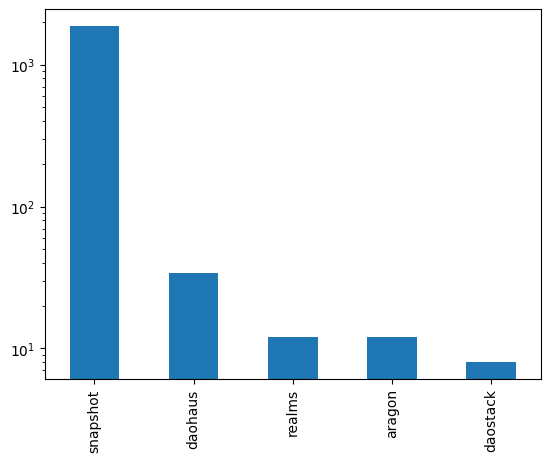

In [44]:
# hist of platform
deployments_on_deepdao['platform'].value_counts().plot(kind='bar', logy=True)

In [45]:
deployments_on_deepdao.groupby('deepdao_organization_id').size().shape
# 1805 organizations on deepdao

(1805,)

<Axes: >

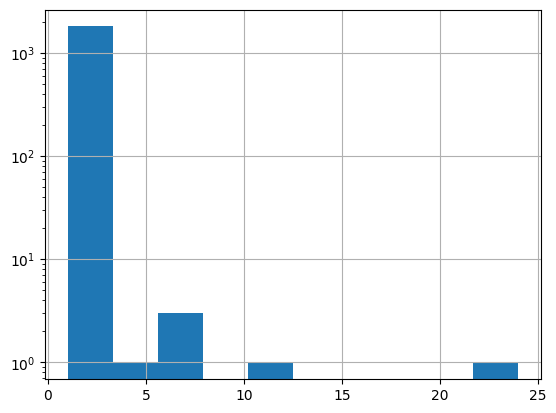

In [46]:
deployments_on_deepdao.groupby('deepdao_organization_id').size().hist(log=True)
# basically all have only 1 deployment

## only the non-deepdao orgs...

In [47]:
deployments_not_on_deepdao = deployments_with_deepdao[deployments_with_deepdao['deepdao_organization_id'].isnull()]
deployments_not_on_deepdao.head()

,platform,platform_id,name,website,additional,votes_count,proposals_count,platform_id_source,deepdao_organization_id
0,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,NaN,NaN,0,0,NaN,NaN
1,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,NaN,NaN,0,0,NaN,NaN
2,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,NaN,NaN,0,0,NaN,NaN
3,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,NaN,NaN,0,0,NaN,NaN
4,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,NaN,NaN,0,0,NaN,NaN


In [48]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [49]:
# transform name column
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [50]:
deployments_not_on_deepdao['name'].notna().value_counts()

True     18659
False     3132
Name: name, dtype: int64

In [51]:
deployments_not_on_deepdao_names = deployments_not_on_deepdao[deployments_not_on_deepdao['name'].notna()]['name']
deployments_not_on_deepdao_names = deployments_not_on_deepdao_names.drop_duplicates().to_list()
len(deployments_not_on_deepdao_names)

17516

In [ ]:
# add an id column that's a uuid hash of the platform and platform_id
import uuid
deployments_not_on_deepdao['id'] = deployments_not_on_deepdao.apply(lambda x: uuid.uuid5(uuid.NAMESPACE_DNS, f"{x['platform']}:{x['platform_id']}"), axis=1)

/var/folders/yn/b6240_995k3gl4vwtnbzzy480000gq/T/ipykernel_9020/3285566627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deployments_not_on_deepdao['id'] = deployments_not_on_deepdao.apply(lambda x: uuid.uuid5(uuid.NAMESPACE_DNS, f"{x['platform']}:{x['platform_id']}"), axis=1)


In [110]:
deployments_not_on_deepdao_ids = deployments_not_on_deepdao['id'].to_list()

In [111]:
# # make a df with a column for the name and a column for the embedding
deployments_not_on_deepdao_ids_and_embeddings = pd.DataFrame({'id': deployments_not_on_deepdao_ids})
deployments_not_on_deepdao_ids_and_embeddings['name_embedding'] = [e for e in embeddings]
# # save as pickle
deployments_not_on_deepdao_ids_and_embeddings.to_pickle('deployments_not_on_deepdao_ids_and_embeddings.pkl')
# read pickle
deployments_not_on_deepdao_ids_and_embeddings = pd.read_pickle('deployments_not_on_deepdao_ids_and_embeddings.pkl')
deployments_not_on_deepdao_ids_and_embeddings.head()

NameError: name 'embeddings' is not defined

In [ ]:
pre_merge_deployments_df = deployments_not_on_deepdao[['platform', 'platform_id', 'name', 'id']]
# drop nan names
pre_merge_deployments_df = pre_merge_deployments_df[pre_merge_deployments_df['name'].notna()]
pre_merge_deployments_df.head()

,platform,platform_id,name,id
0,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,d07997f5-6ecd-53d5-9adb-d67e494e2a07
1,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,5bd17ba9-a2c5-5e4d-83f6-562cbebe3161
2,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,15baea14-a757-51ac-a7f6-af98a75175b4
3,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,7bf65b50-6c89-5477-ba10-1e3cf06848c1
4,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,02c85106-2baf-555f-b440-b5ad2063653d


In [ ]:
# make the id a string
pre_merge_deployments_df['id'] = pre_merge_deployments_df['id'].astype(str)
pre_merge_deployments_df.head()

,platform,platform_id,name,id
0,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,d07997f5-6ecd-53d5-9adb-d67e494e2a07
1,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,5bd17ba9-a2c5-5e4d-83f6-562cbebe3161
2,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,15baea14-a757-51ac-a7f6-af98a75175b4
3,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,7bf65b50-6c89-5477-ba10-1e3cf06848c1
4,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,02c85106-2baf-555f-b440-b5ad2063653d


In [ ]:
pre_merge_pairs_df.shape

(18659, 3)

In [ ]:
# make embeddings into a dict
embedding_lookup_dict = dict(zip(deployments_not_on_deepdao_names_and_embeddings['id'], deployments_not_on_deepdao_names_and_embeddings['name_embedding']))
embedding_lookup_dict

KeyError: 'id'

In [ ]:
pre_merge_deployments_df_array = pre_merge_deployments_df['id'].to_numpy()
pre_merge_deployments_df_array

array(['d07997f5-6ecd-53d5-9adb-d67e494e2a07',
       '5bd17ba9-a2c5-5e4d-83f6-562cbebe3161',
       '15baea14-a757-51ac-a7f6-af98a75175b4', ...,
       '8d3a64b1-6cb5-5d79-be7d-c4a5eb82ccaa',
       '3c151eed-dd52-54d6-95a5-e3fa3caa35bc',
       'bc45ca4c-c840-55ac-92b4-527e5ec4ce73'], dtype=object)

In [ ]:
# break into chunks of 500
pre_merge_deployments_df_chunks = [pre_merge_deployments_df_array[i:i + 500] for i in range(0, len(pre_merge_deployments_df_array), 500)]
len(pre_merge_deployments_df_chunks)

38

In [ ]:
len(pre_merge_deployments_df_chunks[-1])

159

In [ ]:
len(pre_merge_deployments_df_chunks[3])

500

In [ ]:
import itertools
np.array(list(itertools.combinations(pre_merge_deployments_df_chunks[0], 2)))

array([['d07997f5-6ecd-53d5-9adb-d67e494e2a07',
        '5bd17ba9-a2c5-5e4d-83f6-562cbebe3161'],
       ['d07997f5-6ecd-53d5-9adb-d67e494e2a07',
        '15baea14-a757-51ac-a7f6-af98a75175b4'],
       ['d07997f5-6ecd-53d5-9adb-d67e494e2a07',
        '7bf65b50-6c89-5477-ba10-1e3cf06848c1'],
       ...,
       ['b052dcbc-1299-5687-b6c7-7f9443dee895',
        '27492299-2558-533e-a0ac-23be287339e5'],
       ['b052dcbc-1299-5687-b6c7-7f9443dee895',
        '5d01254d-f73e-5d94-8118-9fbcaf71c72a'],
       ['27492299-2558-533e-a0ac-23be287339e5',
        '5d01254d-f73e-5d94-8118-9fbcaf71c72a']], dtype='<U36')

In [ ]:
# make a dir chunks
import os
os.mkdir('deployment_pairs_chunks')
# generate the pairs for each chunk
for i, chunk in enumerate(pre_merge_deployments_df_chunks):
    print(i)
    pairs = np.array(list(itertools.combinations(chunk, 2)))
    print(pairs.shape)
    np.save(f'chunks/{i}.npy', pairs)

0
(124750, 2)
1
(124750, 2)
2
(124750, 2)
3
(124750, 2)
4
(124750, 2)
5
(124750, 2)
6
(124750, 2)
7
(124750, 2)
8
(124750, 2)
9
(124750, 2)
10
(124750, 2)
11
(124750, 2)
12
(124750, 2)
13
(124750, 2)
14
(124750, 2)
15
(124750, 2)
16
(124750, 2)
17
(124750, 2)
18
(124750, 2)
19
(124750, 2)
20
(124750, 2)
21
(124750, 2)
22
(124750, 2)
23
(124750, 2)
24
(124750, 2)
25
(124750, 2)
26
(124750, 2)
27
(124750, 2)
28
(124750, 2)
29
(124750, 2)
30
(124750, 2)
31
(124750, 2)
32
(124750, 2)
33
(124750, 2)
34
(124750, 2)
35
(124750, 2)
36
(124750, 2)
37
(12561, 2)


In [ ]:
# import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
def calculate_similarity(name1, name2):
    embedding1 = embedding_lookup_dict[name1]
    embedding2 = embedding_lookup_dict[name2]
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    return similarity

In [ ]:
# calculate similarity, save in df
pre_merge_pairs_df['similarity'] = pre_merge_pairs_df.apply(lambda row: calculate_similarity(row['left_name'], row['right_name']), axis=1)
pre_merge_pairs_df.head()

,left_platform,left_platform_id,left_name,right_platform,right_platform_id,right_name,similarity
1,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,0.119305
2,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,realms,BDKmQnKFJHaAtiFwwFpyzYWt4y7zHjCHkXXKhfgswymn,test 6666,0.358358
3,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,realms,7ageSmQoFTanbXNMgEYb45ap7bNCc4KL2dzyYDzakXTx,Panda Patrol DAO,0.019956
4,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,realms,9dab9rwkk2uPn2SBKhWuH174VpZG5pD4Jci5zveoa7ug,Bitmon Treasury DAO,0.003927
5,realms,ynQy8iEbJiFuYA4Nom6j7AjV3E7mPYzz9JoMWBfsNMw,sol test,realms,UBWNtt8r6YVdh2tR3KQ1k4yGyY45wWTfCUFR8vwPpFc,sdfi,0.142297


In [ ]:
# sort by similarity
pre_merge_pairs_df = pre_merge_pairs_df.sort_values(by='similarity', ascending=False)
# ignore where the platform_ids are the same
pre_merge_pairs_df = pre_merge_pairs_df[pre_merge_pairs_df['left_platform_id'] != pre_merge_pairs_df['right_platform_id']]
pre_merge_pairs_df.head(20)

,left_platform,left_platform_id,left_name,right_platform,right_platform_id,right_name,similarity
8442,realms,9Xe5qW76XPhyohKaz8joecybGnKrgT4N6JNEuM5ZZwa9,1Sol Dao,realms,26yUdUTWSfpwpNMshahupbXoQKi2NkaTECSyE45VMutU,1Sol DAO,1.000000
4284,realms,26yUdUTWSfpwpNMshahupbXoQKi2NkaTECSyE45VMutU,1Sol DAO,realms,9Xe5qW76XPhyohKaz8joecybGnKrgT4N6JNEuM5ZZwa9,1Sol Dao,1.000000
5352,realms,39aX7mDZ1VLpZcPWstBhQBoqwNkhf5f1KDACguvrryi6,MonkOG DAO,realms,Eg2SufZBj3q1JyQNoJk2AkMtiXFF1gn1wpoCHf9c8qZH,Monkog DAO,1.000000
5253,realms,Eg2SufZBj3q1JyQNoJk2AkMtiXFF1gn1wpoCHf9c8qZH,Monkog DAO,realms,39aX7mDZ1VLpZcPWstBhQBoqwNkhf5f1KDACguvrryi6,MonkOG DAO,1.000000
8136,realms,2aia1CN3YoFergRxyDTPed5Kup4LDmZMEgWxEzZ7vaKB,test,realms,EDs2sLrUuPvGwpJH3G2Q3d6cBHtEWS8ryhoP3zR88DPD,testing,0.908599
3681,realms,EDs2sLrUuPvGwpJH3G2Q3d6cBHtEWS8ryhoP3zR88DPD,testing,realms,2aia1CN3YoFergRxyDTPed5Kup4LDmZMEgWxEzZ7vaKB,test,0.908599
193,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,realms,6E7RUhSYnYidySEpGFMhwfG1jDYnWqYBu6sHadmFRPXt,ckvt6lxqy1513151zoliqfz8w17,0.897009
9301,realms,6E7RUhSYnYidySEpGFMhwfG1jDYnWqYBu6sHadmFRPXt,ckvt6lxqy1513151zoliqfz8w17,realms,2RQ9KQUJocKasNeNniAqwuDL3tPVsyxuPPtgjHgcKaYG,ckvt22w62754511zol5hax8y16,0.897009
9527,realms,EPfaFw1wXRv1vVB4BqvPAAxHoBpetiJHAA2JTx6J7J7m,TestDAO,realms,5W7SsbSUMtCsfN4r4ocV97q7crDRCgqHcG9AnpNFWgaw,testerdao,0.885327
2795,realms,5W7SsbSUMtCsfN4r4ocV97q7crDRCgqHcG9AnpNFWgaw,testerdao,realms,EPfaFw1wXRv1vVB4BqvPAAxHoBpetiJHAA2JTx6J7J7m,TestDAO,0.885327


In [ ]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
# def encode_text_with_bert(text):
#     if text is None or pd.isnull(text):
#         return None
#     input_ids = tokenizer.encode(text, add_special_tokens=True)
#     input_ids = torch.tensor([input_ids])
#     with torch.no_grad():
#         embeddings = model(input_ids)[0]
#     print('.', end='')
#     return embeddings.squeeze().numpy()

In [ ]:
# deployments_not_on_deepdao['name_embeddings'] = deployments_not_on_deepdao['name'].apply(encode_text_with_bert)

In [ ]:
# save as pickle with name_embeddings
# deployments_not_on_deepdao.to_pickle('deployments_not_on_deepdao_with_name_embeddings.pkl')

In [ ]:
# make a dataframe of pairs of deployments not on deepdao
# calculate similarity of name embeddings
# pairs_of_deployments_not_on_deepdao = pd.merge(deployments_not_on_deepdao, deployments_not_on_deepdao, on='platform', suffixes=('_1', '_2'))
# pairs_of_deployments_not_on_deepdao.head()

In [ ]:
# pairs_of_deployments_not_on_deepdao.shape

In [ ]:
# calculate similarity for each pair using the calculate_similarity method above
pairs_of_deployments_not_on_deepdao['similarity'] = pairs_of_deployments_not_on_deepdao.apply(lambda row: calculate_similarity(row['name_embeddings_1'], row['name_embeddings_2']), axis=1)

NameError: name 'pairs_of_deployments_not_on_deepdao' is not defined